<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/10_pca_randomized_svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA:Randomized Singular Value Decomposition

Deciding how many singular values to keep, i.e., where to truncate, is one of the most
important and contentious decisions when using the SVD. There are many factors, including
specifications on the desired rank of the system, the magnitude of noise, and the
distribution of the singular values.

Often, one truncates the SVD at a rank `r` that captures a
predetermined amount of the variance or energy in the original data, such as `90%` or `99%` truncation.

Other techniques involve
identifying “elbows” or “knees” in the singular value distribution, which may denote the
transition from singular values that represent important patterns from those that represent
noise.

Truncation may be viewed as a hard threshold on singular values, where values
larger than a threshold $\tau$ are kept, while remaining singular values are truncated.

In addition, the alignment of data significantly impacts the rank of the SVD approximation.

The SVD essentially relies on a separation of variables between the columns and rows
of a data matrix.

##Setup

In [4]:
import numpy as np
import scipy.io
import os

import skimage.transform

import matplotlib.cm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

In [ ]:
!wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/datasets/jupiter.jpg

##Example of Randomized SVD

To demonstrate the randomized SVD algorithm, we will decompose a high-resolution
image.

In [3]:
# let's define randomized SVD function
def randomized_svd(X, r, q, p):
  # Step 1: Sample column space of X with P matrix
  col_space = X.shape[1]
  P = np.random.randn(col_space, r + p)
  Z = X @ P
  for k in range(q):
    Z = X @ (X.T @ Z)

  Q, R = np.linalg.qr(Z, mode="reduced")

  # Step 2: Compute SVD on projected Y = Q.T @ X
  Y = Q.T @ X
  UY, S, VT = np.linalg.svd(Y, full_matrices=0)
  U = Q @ UY

  return U, S, VT

In [5]:
# let's compute the randomized SVD of high-resolution image
img = imread("jupiter.jpg")
X = np.mean(img, axis=2)  # Convert RGB -> grayscale

# Deterministic SVD
U, S, VT = np.linalg.svd(X, full_matrices=0)

r = 400   # Target rank
q = 1     # Power iterations
p = 5     # Oversampling parameter

rU, rS, rVT = randomized_svd(X, r, q, p)

In [6]:
# Reconstruction
XSVD = U[:, :(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1), :]  # SVD approximation
errSVD = np.linalg.norm(X - XSVD, ord=2) / np.linalg.norm(X, ord=2)

XrSVD = rU[:, :(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1), :]  # SVD approximation
errSVD = np.linalg.norm(X - XrSVD, ord=2) / np.linalg.norm(X, ord=2)

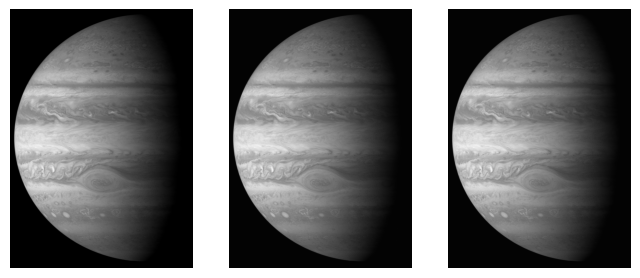

In [7]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

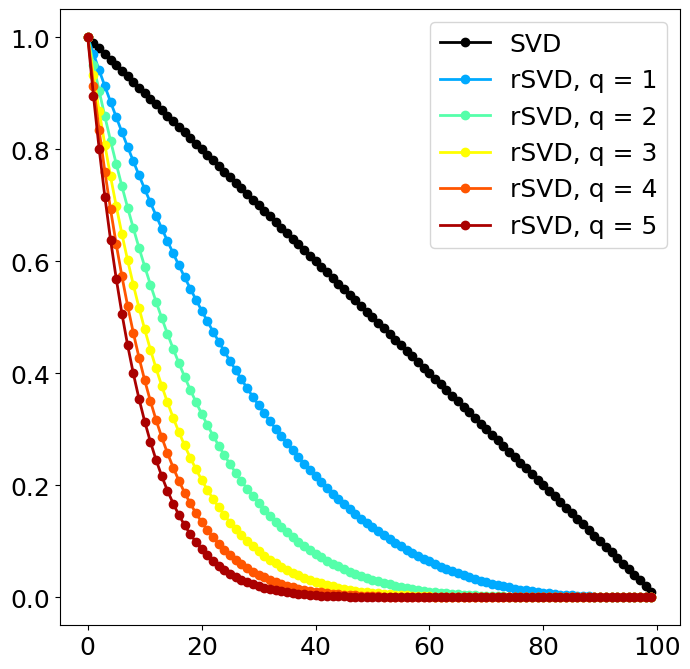

In [8]:
# Illustrate power iterations
X = np.random.randn(1000, 100)
U, S, VT = np.linalg.svd(X, full_matrices=0)
S = np.arange(1, 0, -0.01)
X = U @ np.diag(S) @ VT

# Define color map
color_list = np.array([
    [0,0,2/3],
    [0,0,1],
    [0,1/3,1],
    [0,2/3,1],
    [0,1,1],
    [1/3,1,2/3],
    [2/3,1,1/3],
    [1,1,0],
    [1,2/3,0],
    [1,1/3,0],
    [1,0,0],
    [2/3,0,0]
])

plt.plot(S,'o-',color='k',linewidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq, '-o', color=tuple(color_list[2*q+1]), linewidth=2, label='rSVD, q = '+str(q))

plt.legend()
plt.show()